# inferential Statistik
pertemuan ke-10<br>
inferential statistics digunakan di saat kita ingin menguji hipotesis tentang populasi dengan menggunakan sampel dari populasi.<br>
hipotesis adalah sebuah pernyataan yang menggambarkan hubungan antara dua atau lebih variabel


In [178]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

In [179]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

rumus uniform distribution :<br>
$$ f(x) = \frac{1}{b-a}  for a < x < b,   $$
$$ f(x) = 0  , otherwise $$

<img src="https://files.cdn.thinkific.com/file_uploads/236035/images/44e/f38/a54/1603345670753.jpg?width=1920" style='align-content : justify'/>   

In [180]:
from scipy.stats import uniform

In [181]:
# random numbers from uniform distribution
n = 18880
start = 10
width = 20
data_uniform = uniform.rvs(size = n, loc = start, scale = width)

[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

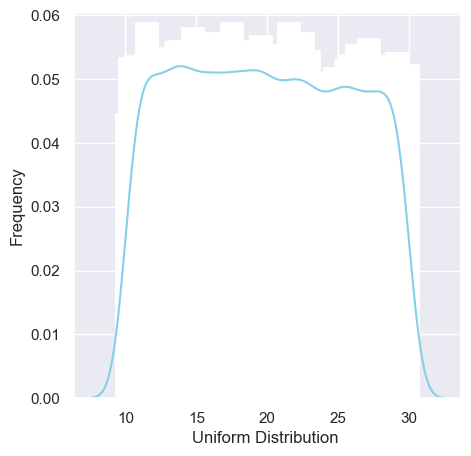

In [182]:
ax = sns.distplot(data_uniform,
                bins=100,
                kde=True,
                color='skyblue',
                hist_kws={"linewidth":15, 'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')


## normal distribution

rumus normal distribution :<br>
$$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

normal distribution adalah distribusi yang paling sering digunakan dalam inferential statistics. distribusi ini memiliki 2 parameter yaitu mean dan standard deviation. distribusi ini juga memiliki 2 karakteristik yaitu simetris dan bell shaped.

contoh distribusi normal :<br>
<img src="https://www.scribbr.de/wp-content/uploads/2023/01/standard-normal-distribution-example.webp" style='align-content : justify'/>

In [183]:
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

[Text(0.5, 0, 'Normal Distribution '), Text(0, 0.5, 'Frequency')]

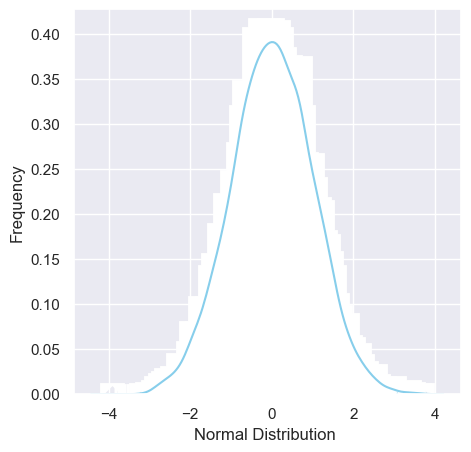

In [184]:
ax = sns.distplot(data_normal,
                bins=100,
                kde=True,
                color='skyblue',
                hist_kws={"linewidth":15, 'alpha':1})
ax.set(xlabel='Normal Distribution ', ylabel='Frequency')

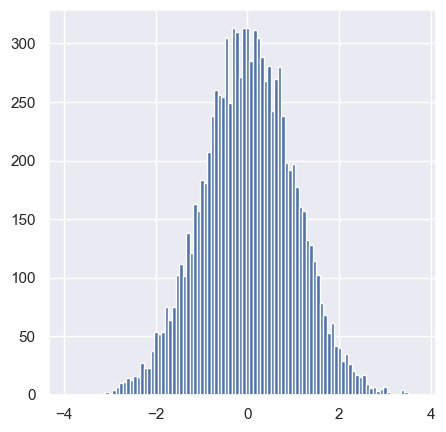

In [185]:
plt.hist(data_normal, bins=100)
plt.show()

## gamma distribution


Distribusi Gamma adalah sebuah distribusi probabilitas yang sering digunakan untuk memodelkan berbagai macam fenomena alamiah dan sosial. distribusi gamma sering digunakan untuk menggambarkan waktu yang dibutuhkan untuk terjadinya suatu peristiwa tertentu. Distribusi ini memiliki dua parameter, yaitu parameter shape dan scale. Parameter shape menentukan bentuk kurva distribusi, sementara parameter scale mengontrol besarnya variansi.

gambar gamma distribution :<br>

<img src="https://www.statology.org/wp-content/uploads/2021/11/gammaPython1.png" style='align-content : justify , weight : 50% , widht : 50%'/>

In [186]:
# gamma distribution with shape = 2 and scale = 2
from scipy.stats import gamma

In [187]:
data_gamma = gamma.rvs(a=5, size=10000) # rvs = random variates (random numbers)

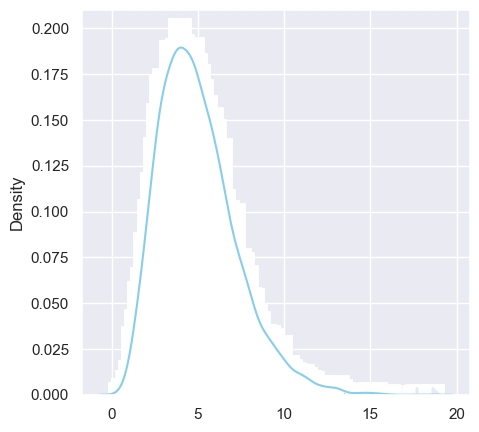

In [188]:

ax = sns.distplot(data_gamma, bins=100, kde=True, color='skyblue', hist_kws={"linewidth":15, 'alpha':1})

## Exponential distribution

In [189]:
# Exponential distribution adalah distribusi yang menghasilkan nilai yang semakin besar seiring waktu berjalan.
# Parameter yang digunakan adalah scale, yang menggambarkan rata-rata dari distribusi.
# Semakin besar nilai scale, semakin besar pula nilai yang dihasilkan.

In [190]:
from scipy.stats import expon

rumus exponential distribution :<br>
<center><img src='https://www.itl.nist.gov/div898/handbook/eda/section3/gif/exppdf.gif' style='align-content: justify'  >

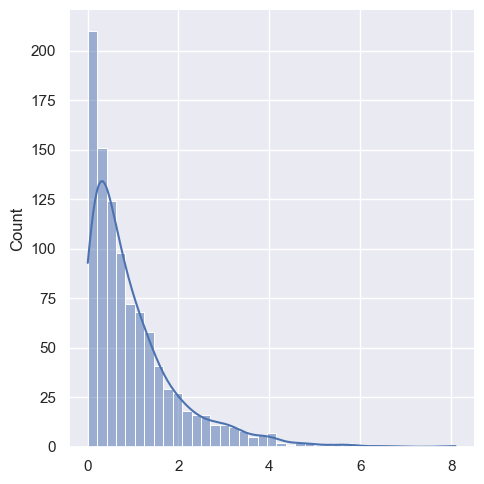

In [191]:
d_expon = expon.rvs(scale=1,loc=0,size=1000)
sns.displot(d_expon, kde=True)

## poisson distribution

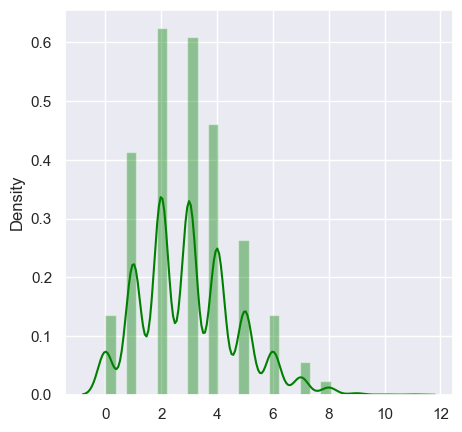

In [192]:
# poisson distribution
from scipy.stats import poisson

data_poisson = poisson.rvs(mu=3, size=10000)
ax = sns.distplot(data_poisson, bins=30, kde=True, color='green')

## Binomial Distribution (Discrete)

<Axes: ylabel='Density'>

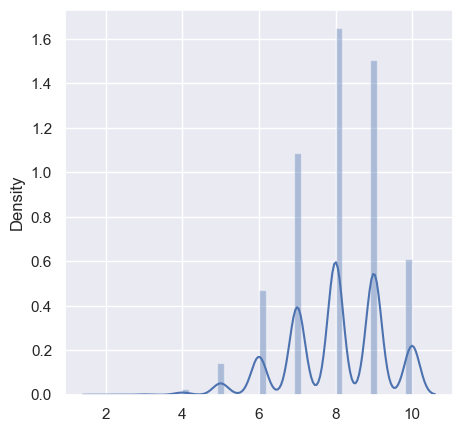

In [193]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)
sns.distplot(data_binom)

# Bernoulli Distribution (Discrete)

<Axes: ylabel='Density'>

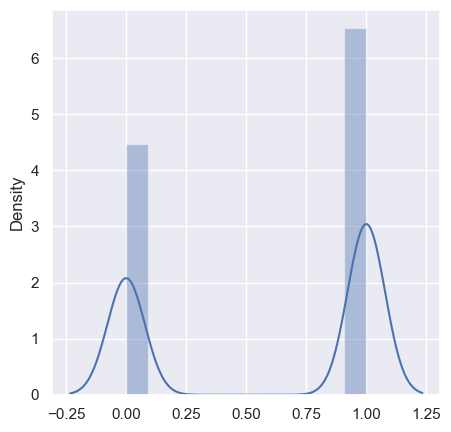

In [194]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.6)
sns.distplot(data_bern)

# Confidence Interval

In [195]:
import pandas as pd
import numpy as np

In [196]:
df = pd.read_csv('./Dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [197]:
df['Sex1'] = df.sex.replace({1:'Male', 0:'Female'})

In [198]:
dx = df[['Sex1','target']].dropna() 

In [199]:
pd.crosstab(dx.target, dx.Sex1)

Sex1,Female,Male
target,,
0,86,413
1,226,300


In [200]:
p_fm = 226/(86+266)
p_fm

0.6420454545454546

In [201]:
n = 86+266
n

352

In [202]:
se_female = np.sqrt(p_fm*(1-p_fm)/n)
se_female

0.025552035190857417

In [203]:
z_score = 1.96
lcb = p_fm - z_score * se_female # lower bound
ucb = p_fm + z_score * se_female # upper bound
print(lcb, ucb)

0.591963465571374 0.6921274435195351


In [204]:
stderror_fm = (p_fm*(1-p_fm)/n)**(1/2)
stderror_fm

0.025552035190857417

## Calculation of CI of mean

menggunakan data heart disease yang memiliki kolom 'chol' yang berisi tingkat kolestrol

1. menghitung mean, standard deviation, dan population size dari populasi pria dan wanita

In [205]:
df.groupby("Sex1").agg({"chol": [np.mean, np.std, np.size]})

chol                
              mean        std size
Sex1                              
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

In [206]:
mean_fe = 261.45
sd = 64.4
n = 312
z = 1.96

2. calculate the standard error using the formula for the standard error of the mean

dengan z-score = 1.96 dan confidence level = 95%

In [207]:

se = sd / np.sqrt(n)

3. construct the CI

In [208]:
LCB = mean_fe - z * se
UCB = mean_fe + z * se
LCB, UCB

(254.3039731821066, 268.59602681789335)

## Other Example of Confidence Intervals

In [209]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

**Generate Data of People's Mass in Pounds**

generate dua distribusi normal menggunakna metode numpy random module's normal() untuk pria dan wanita. menggabungkan dua array ini dan assign ke kolom *us_people_mass_pounds* di *df_ppl_mass* DataFrame

In [210]:
np.random.seed(42)
normal_Distribution_us_male_mass_pounds = np.random.normal(loc=181, scale=24, size=6000)
normal_Distribution_us_female_mass_pounds = np.random.normal(loc=132, scale=22, size=6500)

all_mass_values = np.concatenate((normal_Distribution_us_male_mass_pounds, normal_Distribution_us_female_mass_pounds), axis=0)
df_ppl_mass = pd.DataFrame(data={'us_people_mass_pounds': all_mass_values})

In [211]:
df_ppl_mass

,us_people_mass_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319
...,...
12495,120.060669
12496,152.223744
12497,148.408843
12498,127.938558


**View Distribution of U.S. People's Mass**

Menggunakan seaborn distplot() untuk histogram di kolom us_people_mass_pounds

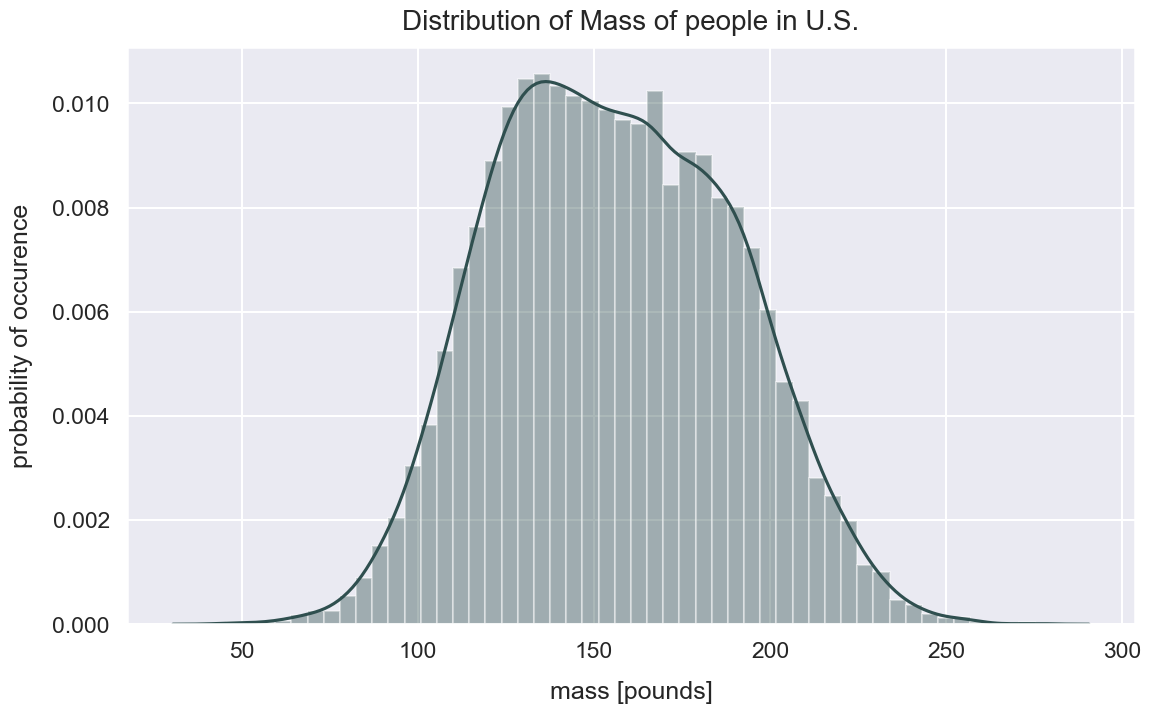

In [212]:
sns.distplot(df_ppl_mass['us_people_mass_pounds'], kde=True,
           color='darkslategrey')
plt.xlabel("mass [pounds]", labelpad=14)
plt.ylabel("probability of occurence", labelpad = 14)
plt.title("Distribution of Mass of people in U.S.", y=1.015,
         fontsize=20);

In [213]:
#Calculation Population Mean

pop_mean_mass = df_ppl_mass['us_people_mass_pounds'].mean()
pop_mean_mass

155.4232805942338

In [214]:
#Calculate Population Standard Deviation

pop_std_dev_mass = df_ppl_mass['us_people_mass_pounds'].std()
pop_std_dev_mass

33.585190883958624

mengambil 300 sampel masing-masing dari 25 nilai acak. untuk setiap sampel akan dihitung rata-rata sampel. simpan semua sample means tersebut kedalam list sample_means

In [215]:
sample_means = []
n = 25
for sample in range (0, 300):
    sample_values= np.random.choice(a=df_ppl_mass['us_people_mass_pounds'], size = n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

Text(0, 0.5, 'frequency of occurence')

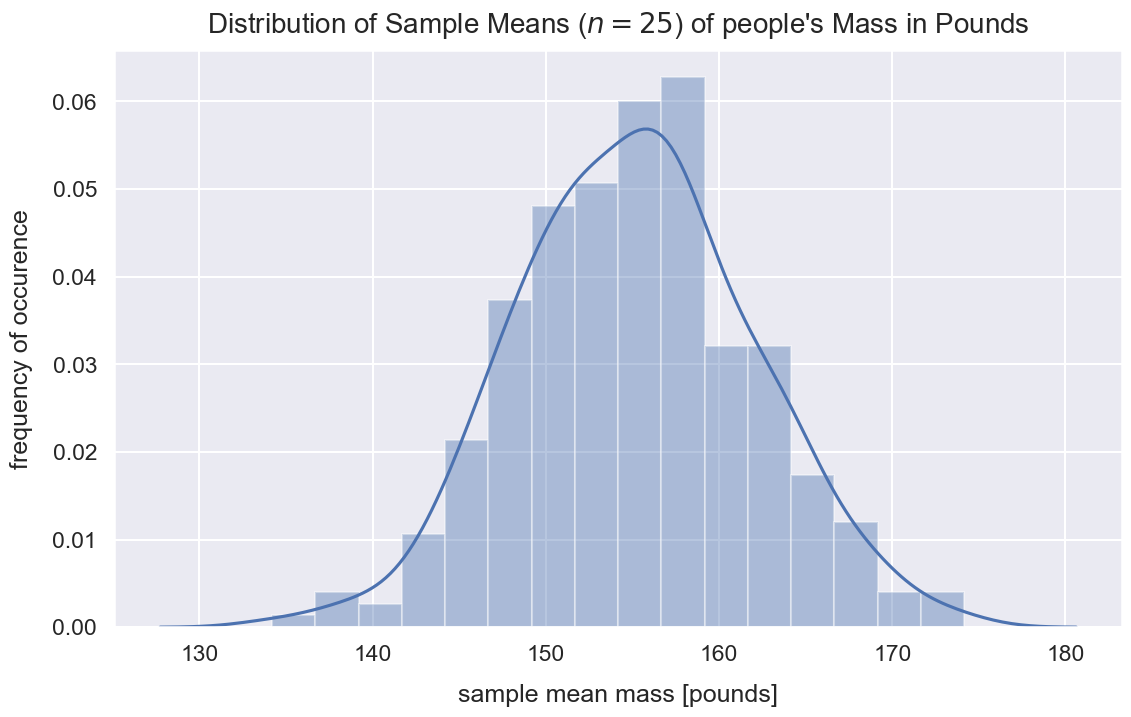

In [216]:
#view distribution of Sample Means (otherwise Called Sampling Distribution)
sns.distplot(sample_means)
plt.title("Distribution of Sample Means ($n=25$) of people's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)

distribusi sample means terlihat normal, menurut central limit theorem, pengambilan sample dalam jumlah yang cukup dengan ukuran yang memadai akan menghasilkan distribusi sample means yang normal

**Calculate Sampling Distribution (n=25) Summary Statistics**
ringkasan perhitungan statistik untuk distribusi pengambilan sampel yang divisualisasikan diatas:

In [217]:
#calculate median of sample means
median_of_sample_means = np.median(sample_means)
median_of_sample_means

155.3008268518431

In [218]:
#calculate mean of sample means
mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

155.12418330193915

In [219]:
pop_mean_mass

155.4232805942338

**nilai mean_of_sample_means hampir sama dg nilai population mean yang ditetapkan ke variabel pop_mean_mass.**

In [220]:
#calculate standard deviation of sample means
std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

6.734407481483423

**Equation for standard deviation of Sampling Distribution**

In [221]:
standard_error = pop_std_dev_mass / np.sqrt(n)
standard_error

6.717038176791725

In [222]:
std_dev_of_sample_means

6.734407481483423

**Critical Z-Scores**

menggunakan z=score 1,96 untuk menghitung ekor 0,025

In [223]:
tail = 1 - stats.norm.cdf(1.96)
tail

0.024997895148220484

In [224]:
#the area under the curve between the z-critcal scores is approximately 0.95
1 - (tail*2)

0.950004209703559

menghitung batas yang tepat untuk area dimana 95% mean sample berada dari mean populasi

In [225]:
lower_95_perc_bound = mean_of_sample_means - 1.96 * standard_error
lower_95_perc_bound

141.95878847542738

In [226]:
upper_95_perc_bound = mean_of_sample_means + 1.96 * standard_error
upper_95_perc_bound

168.28957812845093

Text(0, 0.5, 'frequency of occurence')

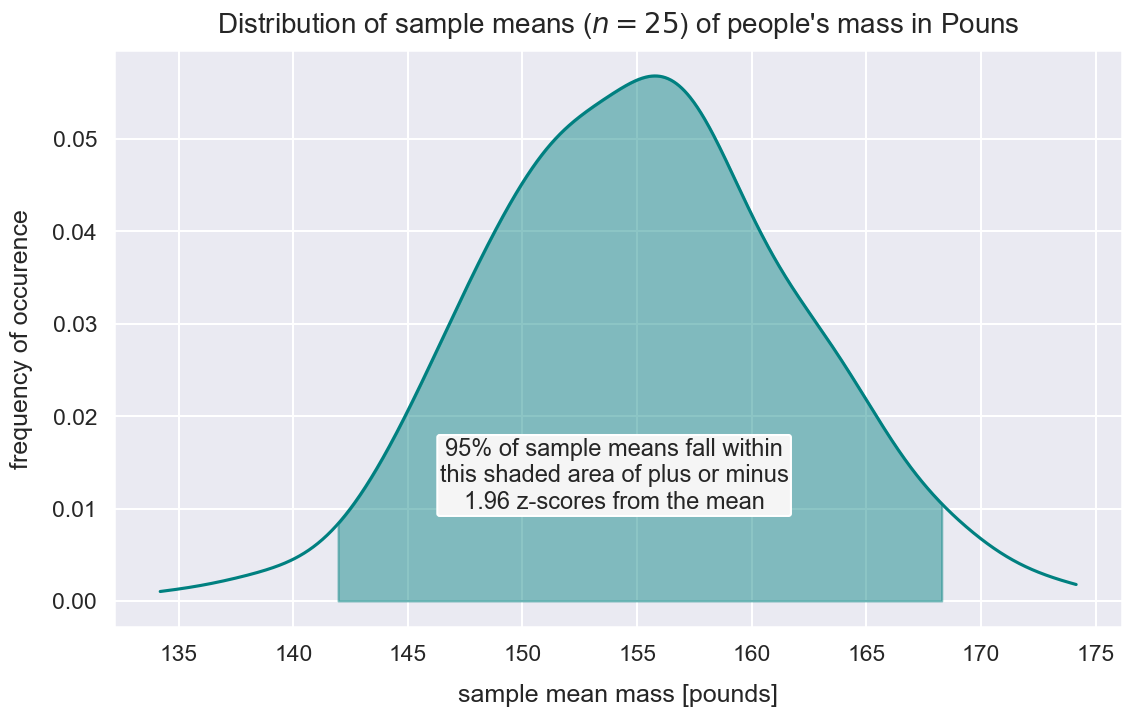

In [227]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 1000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace (lower_95_perc_bound, upper_95_perc_bound, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')
plt.text(x = 154, y = .01, horizontalalignment='center', fontsize=17,
        s='95% of sample means fall within\nthis shaded area of plus or minus\n1.96 z-scores from the mean',
        bbox = dict(facecolor='whitesmoke', boxstyle='round, pad=0.1'))
plt.title("Distribution of sample means ($n=25$) of people's mass in Pouns", y=1.015, fontsize=20 )
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)

## Hypothesis Testing

In [229]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### One population Proportion

**conclution of the hypothesis test**

karena nilai p-value dr z test cukup kecil, maka H0 ditolak. sehingga ada kemungkinan besar bahwa proporsi ini lebih dari 52%

### Difference in Population Means

In [231]:
url = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [232]:
females = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]

In [233]:
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

(n1, mu1, sd1)

(2976, 29.939945652173996, 7.75331880954568)

In [234]:
n2 = len(male)
mu2 = male["BMXBMI"].mean()
sd2 = male["BMXBMI"].std()
(n2, mu2, sd2)

(2759, 28.778072111846985, 6.252567616801485)

**Conclusion of the hypothesis test**

karena p-value (6.59e-10) sangat kecil, maka H0 ditolak (rata-rata BMI laki=laki sama dengan perempuan)

**membuat histogram untuk memeriksa apakah data berdistribusi normal**

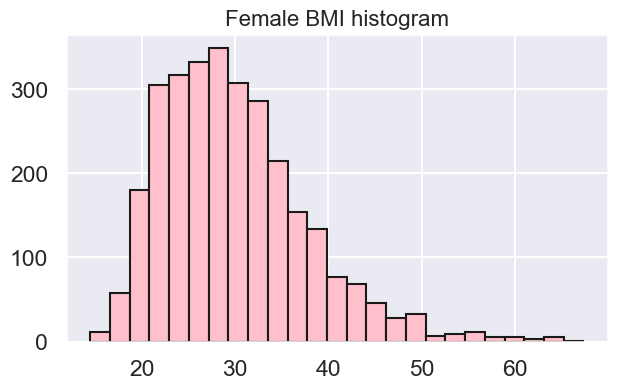

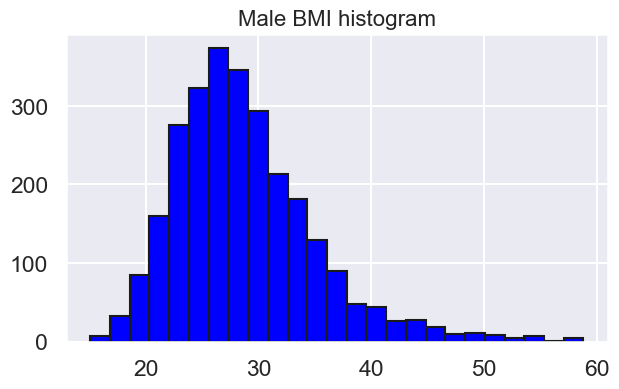

In [236]:
plt.figure(figsize=(7,4))
plt.title('Female BMI histogram', fontsize = 16)
plt.hist(females["BMXBMI"].dropna(), edgecolor = 'k', color='pink', bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title('Male BMI histogram', fontsize = 16)
plt.hist(male["BMXBMI"].dropna(), edgecolor = 'k', color='blue', bins=25)
plt.show()

## Hypothesis Testing for one proportion

In [242]:
import pandas as pd
import numpy as np
import scipy.stats.distributions as dist
df = pd.read_csv('./Dataset/Heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**The population proportion of Ireland having heart disease is 42%. Are more people suffering from heart disease in the US?**

1. Define the null hypothesis and alternative hypothesis

null hypothesis: population proportion penderita jantung di AS <= 42%

hypothesis alternatif: proporsi penduduk AS penderita jantung > 42%

H0: p0 = 0.42  #null hypothesis
Ha: p > 0.42   #alternative hypothesis

2. assume that the dataset above is a representative sample from the population of the US. so, calculate th epopulation proportion of the US having heart disease

In [243]:
p_us = len(df[df['target']=='1']) / len(df)
p_us

0.0

3. Calculate the Test Statistics

In [244]:
se = np.sqrt(0.42 * (1 - 0.42) / len(df))

In [245]:
#best estimate
be = p_us

#hypothesized estimate
he = 0.42
test_stat = (be - he) / se
test_stat

-27.244107240105055

4. calculate the p-value

In [246]:
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
pvalue

1.9517162972676465e-163

5. infer the conclusion from the p-value

p-value < sig 0.05 sehingga H0 ditolak. maka terdapat peberdaan yg signifikan dalam proporsi penduduk yg menderita penyakit jantung di Irlandia dan US

## Statistical Hypothesis Test Cheat sheet

### Normality Test

**Shapiro-wilk Test**

In [247]:
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else: 
    print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


**D'Agostino's K^2 Test**

In [248]:
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else: 
    print('Probably not Gaussian')

stat=3.392, p=0.183
Probably Gaussian


**Anderson-Darling Test**

In [249]:
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data)
print('stat=%.3f' %(result.statistic))
for i in range (len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.424
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


## Correlation Tests

**Pearson Correlation Coefficient**

In [250]:
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else: 
    print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


**Spearman's Rank Correlation**

In [251]:
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else: 
    print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


**Kendall's Rank Correlation**

In [252]:
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else: 
    print('Probably dependent')

stat=0.733, p=0.002
Probably dependent


**Chi-Squared Test**

In [253]:
from scipy.stats import chi2_contingency
table = [[10, 20, 30], [6, 9, 17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else: 
    print('Probably dependent')

stat=0.272, p=0.873
Probably independent


## Parametric Statistical Hypothesis Tests

**Student's t-Test**

In [255]:
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else: 
    print('Probably different distribution')

stat=0.515, p=0.613
Probably the same distribution


**Paired Student's t-test**

In [256]:
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else: 
    print('Probably different distribution')

stat=0.741, p=0.478
Probably the same distribution


**Analysis of Variance Test (ANOVA)**

In [257]:
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway (data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else: 
    print('Probably different distribution')

stat=0.096, p=0.908
Probably the same distribution


## Nonparametric Statistical Hypothesis Tests

**Mann-Whitney U test**

In [258]:
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    printnt('Probably different distribution')

stat=40.000, p=0.473
Probably the same distribution


**Wilcoxon Signed-Rank Test**

In [259]:
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distribution')

stat=21.000, p=0.557
Probably the same distribution


**Kruskal-Wallis H Test**

In [260]:
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    printnt('Probably different distribution')

stat=0.571, p=0.450
Probably the same distribution


**Friedman Test**

In [261]:
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    printnt('Probably different distribution')

stat=0.800, p=0.670
Probably the same distribution
